In [1]:
import tensorflow  as tf
import numpy as np 
import zipfile
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import cv2

from tensorflow.keras.datasets import mnist

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

import imutils
from imutils.contours import sort_contours

In [2]:
model = tf.keras.models.load_model('./models/second_model.h5')

name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]
len(name_labels)

36

1/1 [==============================] - 0s 18ms/step
['B', '1', 'D', '2', 'C', '3', 'A', '4', 'B', '5', 'D', 'B', 'C', '7']


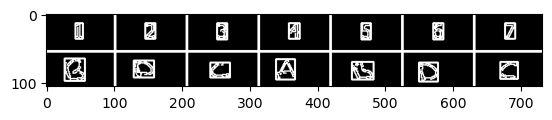

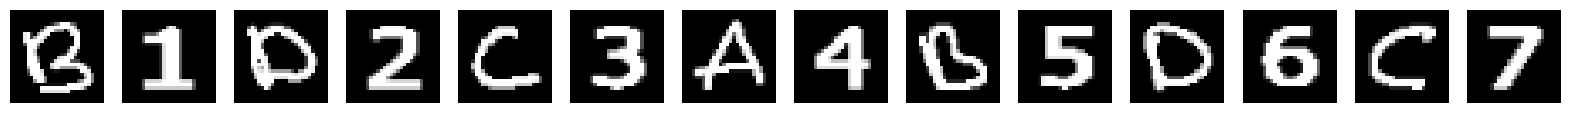

In [3]:
def preprocessing_img(path_img):
    img = cv2.cvtColor(cv2.imread(path_img), cv2.COLOR_BGR2GRAY) 
    thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
    # thresh = cv2.erode(thresh, np.ones((3,3), np.uint8))

    thresh = cv2.Canny(thresh, 40, 150)
    thresh = cv2.dilate(thresh, np.ones((2,2), np.uint8))
    # thresh = cv2.GaussianBlur(thresh, (5,5), 0)

    return img, thresh

gray, thresh = preprocessing_img(path_img='./images_test/img_001.png')

    
def find_contours(img):
    img_copy = img.copy()
    conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    conts = imutils.grab_contours(conts)
    conts = sort_contours(conts, method='left-to-right')[0]

    min_w, max_w = 5, 90
    min_h, max_h = 10, 90 
    n = 5
    letters = []
    conts_2 = []
    for c in conts:
        (x, y, w, h) = cv2.boundingRect(c)
        if (w >= min_w and w < max_w) and (h >= min_h and h < max_h):
            img_p = gray[y-n : y+h+n,   x-n : x+n+w ]
            cv2.rectangle(img_copy, (x,y), (x+w, h+y), (255,100,0),2)
            img_p = cv2.threshold(img_p, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            img_p = cv2.dilate(img_p, np.ones((2,2), np.uint8 ))
            letters.append(img_p)
            conts_2.append(c)
    plt.imshow(img_copy, cmap='gray');
    return letters, conts_2

1

def img_prediction(img, model, name_labels):
    img = cv2.resize(img, (28,28))
    img = img.astype('float32')/255.0
    img = np.expand_dims(img, axis=-1)
    img = np.reshape(img, (1,28,28,1))

    prediction = model.predict(img)
    prediction = name_labels[np.argmax(prediction)]

    return prediction


letters = find_contours(thresh)[0]

img_predictions = []
for letter in letters:
    img = img_prediction(letter, model, name_labels)
    img_predictions.append(img)

print(img_predictions)

fig, axes = plt.subplots(1, len(letters), figsize=(20,5) )

for i, letter in enumerate(letters):
    letter = cv2.resize(letter, (28,28))
    axes[i].imshow(letter, cmap='gray')

    axes[i].axis('off')

1/1 [==============================] - 0s 20ms/step
['A', '1', 'B', '2', 'C', '3', 'A', '4', 'B', '5', 'P', 'B', 'A', '7']


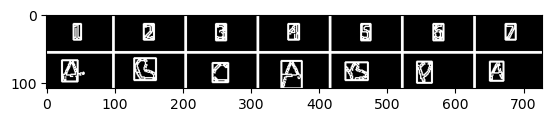

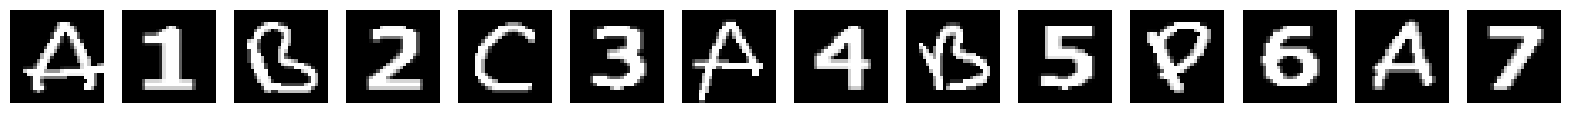

In [4]:
model = tf.keras.models.load_model('./models/second_model.h5')

name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]
len(name_labels)

def preprocessing_img(path_img):
    img = cv2.cvtColor(cv2.imread(path_img), cv2.COLOR_BGR2GRAY) 
    thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
    # thresh = cv2.erode(thresh, np.ones((3,3), np.uint8))

    thresh = cv2.Canny(thresh, 40, 150)
    thresh = cv2.dilate(thresh, np.ones((2, 2), np.uint8))
    # thresh = cv2.GaussianBlur(thresh, (5,5), 0)

    return img, thresh
x = r'C:\Users\santi\OneDrive - Universidad Pedagogica Nacional\teisis_maestria\tesis_1\images_test\img_029.png'
x =x.replace('\\', '/')
gray, thresh = preprocessing_img(path_img=x)


    
def find_contours(img):
    img_copy = img.copy()
    conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    conts = imutils.grab_contours(conts)
    conts = sort_contours(conts, method='left-to-right')[0]

    min_w, max_w = 5, 50
    min_h, max_h = 15, 45 
    n = 5
    letters = []
    conts_2 = []
    for c in conts:
        (x, y, w, h) = cv2.boundingRect(c)
        if (w >= min_w and w < max_w) and (h >= min_h and h < max_h):
            img_p = gray[y-n : y+h+n,   x-n : x+n+w ]
            cv2.rectangle(img_copy, (x,y), (x+w, h+y), (255,100,0),2)
            img_p = cv2.threshold(img_p, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            img_p = cv2.dilate(img_p, np.ones((2,2), np.uint8 ))
            letters.append(img_p)
            conts_2.append(c)
    plt.imshow(img_copy, cmap='gray');
    return letters, conts_2

def img_prediction(img, model, name_labels):
    img = cv2.resize(img, (28,28))
    img = img.astype('float32')/255.0
    img = np.expand_dims(img, axis=-1)
    img = np.reshape(img, (1,28,28,1))

    prediction = model.predict(img)
    prediction = name_labels[np.argmax(prediction)]

    return prediction

letters = find_contours(thresh)[0]

img_predictions = []
for letter in letters:
    img = img_prediction(letter, model, name_labels)
    img_predictions.append(img)

print(img_predictions)

fig, axes = plt.subplots(1, len(letters), figsize=(20,5) )

for i, letter in enumerate(letters):
    letter = cv2.resize(letter, (28,28))
    axes[i].imshow(letter, cmap='gray')

    axes[i].axis('off')

Tipo de letra 
**TAHOMA**

Tamaño 
**16**

Palabras de pregunta y respuestas separadas por espacio cada letra

**P R E G U N T A**


**R E S P U E S T A**

Ancho de columna lo suficiente para que quepa una letra sin estar muy cerca a los bordes

* Problemas entre el número de opciones 


In [5]:
question_row = []
answer_row = []
for i in range(len(img_predictions)):
    if i%2 == 0:
        question_row.append(img_predictions[i])
    else:
        answer_row.append(img_predictions[i])

1/1 [==============================] - 0s 18ms/step
B
1
C
2
A
3
D
4
E
5
A
S
B
7


['B', 'C', 'A', 'D', 'E', 'A', 'B']

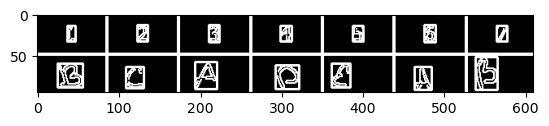

In [6]:
import tensorflow  as tf
import numpy as np 
import pandas as pd
import cv2
import imutils
from imutils.contours import sort_contours

import tensorflow as tf 
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt

model = load_model('./models/second_model.h5')

def names_label():
    names = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    names = [label for label in names]
    return names 


def prepro_img(path_img):
    gray = cv2.cvtColor(cv2.imread(path_img), cv2.COLOR_BGR2GRAY)
    img = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
    img = cv2.Canny(img, 40, 150)
    img = cv2.dilate(img, np.ones((2,2), np.uint8))
    return gray, img


def find_contours(img, gray):
    img_copy = img.copy()
    gray = np.array(gray)
    conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    conts = imutils.grab_contours(conts)
    conts = sort_contours(conts, method='left-to-right')[0]

    min_w, max_w = 5, 50
    min_h, max_h = 15, 45 
    n = 5
    letters = []
    conts_2 = []
    
    for c in conts:
        (x, y, w, h) = cv2.boundingRect(c)
        if (w >= min_w and w < max_w) and (h >= min_h and h < max_h):
            img_p = gray[y-n : y+h+n,   x-n : x+n+w ]
            cv2.rectangle(img_copy, (x,y), (x+w, h+y), (255,100,0),2)
            img_p = cv2.threshold(img_p, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            img_p = cv2.dilate(img_p, np.ones((2,2), np.uint8 ))
            letters.append(img_p)
            conts_2.append(c)
    plt.imshow(img_copy, cmap='gray');
    return letters, conts_2





def img_prediction(img, model, name_labels):
    img = cv2.resize(img, (28,28))
    img = img.astype('float32')/255.0
    img = np.expand_dims(img, axis=-1)
    img = np.reshape(img, (1,28,28,1))

    prediction = model.predict(img) 
    prediction = name_labels[np.argmax(prediction)]

    return prediction



def letter_pred(img, gray):
    names = names_label()
    letters = find_contours(img, gray)[0]
    img_pred = [img_prediction(letter, model, names) for letter in letters]
    question_row = []
    answer_row = []

    for i in range(len(img_pred)):
        if img_pred[i] == 'Z' or img_pred[i] == 'G' or img_pred[i] == '0' or img_pred[i] == 'J' or img_pred[i] == 'T' or img_pred[i] == 'P' or img_pred[i] == 'Q' or img_pred[i] == '8':
            img_pred[i] = img_pred[i].replace('Z', '2')
            img_pred[i] = img_pred[i].replace('G', '6')
            img_pred[i] = img_pred[i].replace('T', '1')
            img_pred[i] = img_pred[i].replace('Q', 'D')
            img_pred[i] = img_pred[i].replace('P', 'D')
            img_pred[i] = img_pred[i].replace('8', 'B')
            img_pred[i] = img_pred[i].replace('0', 'D')
            img_pred[i] = img_pred[i].replace('J', 'A')
            
        
        print(img_pred[i])

        if i%2 == 0:
            if img_pred[i] == '4':
                img_pred[i] = img_pred[i].replace('4', 'A')
            answer_row.append(img_pred[i])
        else:
            question_row.append(img_pred[i]) 


    return  answer_row

x = r'C:\Users\santi\OneDrive - Universidad Pedagogica Nacional\teisis_maestria\tesis_1\images_test\img_045.png'
x =x.replace('\\', '/')
gray, img = prepro_img(x)

answer_row = letter_pred(img, gray)
answer_row




In [7]:
import pandas as pd

# validation = '''  ababcda  bcdabca. Acdebac. Eeeeeee. Abababa  acbacba  abcdeab. Dcbaabc. Adbcade. Abcdead. Abcdeac  eabcdea. Aaaaaaa  eabcdea. Edabcde. Eabcdea. Abcdeba. Bcadeab. Abcdbae. Abababa. Cacacac. Abcddab. Baabada. Abcdbad. Cddbbad. Addbbac. Ccccccc. Abbacab. Bbdcbdb. Acdbbdc. Acbddbc. Abcdbdd. Bbbbbbb. Abcabca. Bdcabdc. Abcabda. Addbadd. Dbbdbac. Abdcabd  abcddea. Abccbaa  bdabeeb. Debaeba. Aebcdab. Bdbbbda. Abcdeeb. Adebeeb.'''
# validation = '''    BDCABDC ABCDEEB ADEBEEB ABABABA ACBDDBC EABCDEA BBDCBDB ACBACBA BCDABCA ABCDBDD 
#                     ADBCADE ABCABCA baabada AAAAAAA EABCDEA ADDBBAC ABCDEAC ABCDEBA ABABCDA ABDCABD
#                     ABABABA CACACAC ABBACAB ABCDDAB DBBDBAC ABCDBAD ABCDEAD CCCCCCC ABCABDA BDBBBDA
#                     EDABCDE ACDEBAC ACDBBDC ABCDBAE BBBBBBB ABCDEAB AEBCDAB CDDBBAD ADDBADD EABCDEA 
#                     EEEEEEE ABCDDEA ABCCBAA DCBAABC BCADEAB BDABEEB DEBAEBA '''

validation = '''    BDCABDC ABCDEEB ADEBEEB ABABABA ACBDDBC EABCDEA BBDCBDB ACBACBA BCDABCA ABCDBDD ADBCADE ABCABCA baabada AAAAAAA EABCDEA ADDBBAC ABCDEAC ABCDEBA ABABCDA ABDCABD ABABABA CACACAC ABBACAB ABCDDAB DBBDBAC ABCDBAD ABCDEAD CCCCCCC ABCABDA BDBBBDA EDABCDE ACDEBAC ACDBBDC ABCDBAE BBBBBBB ABCDEAB AEBCDAB CDDBBAD ADDBADD EABCDEA  EEEEEEE ABCDDEA ABCCBAA DCBAABC BCADEAB BDABEEB DEBAEBA '''

validation = validation.upper().split(' ')
validation_2 = []

for i in validation:
    if len(i) > 0:
        i  = i.replace('.', '')
        validation_2.append(i)

val = [ [] for i in range(len(validation_2))]    
for list in range(len(validation_2)):
    for element in validation_2[list]:
        val[list].append(element)
val
df_val = {1+i:val[i] for i in range(len(val))}
df_val = pd.DataFrame(df_val).T
len_col = 0
for i in df_val:
    len_col+=1
len_col

7

In [8]:
def organize(num_option):
    num = '000'
    x = num_option
    list_1 = []
    list_2 = []
    list_3 = []

    last_num = int(num[-1])
    second_num = int(num[-2])
    first_num = int(num[0])

    for i in range(x):
        i = 1
        last_num = last_num + i
        if last_num == 10:
            second_num += 1
            last_num = 0

        if second_num == 10:
            first_num += 1
            second_num = 0
        
        list_1.append(last_num)
        list_2.append(second_num)
        list_3.append(first_num)

    list_4 = [list_3, list_2, list_1]

    df_test = pd.DataFrame(list_4).T
    response = []
    final_row = ''
    for i in range(x):
        for j in df_test.loc[i][::]:
            final_row += str(j)
        response.append(final_row)
        final_row=''

        
    return response



In [9]:
# import os 

# x = os.listdir('./images_test')
# organized_files = organize(num_option=len(x))
# for i in range(len(x)):
    
#     new_name = os.path.join(os.path.join('./images_test'), f'img_{organized_files[i]}.png')
#     os.rename(os.path.join('./images_test', x[i]), new_name )

# files = os.listdir(path='./images_test')


1/1 [==============================] - 0s 17ms/step
B
1
D
2
C
3
A
4
B
5
D
B
C
7
********** ['B', 'D', 'C', 'A', 'B', 'D', 'C'] **********
********** 1 **********
********** img_001.png **********
1/1 [==============================] - 0s 18ms/step
A
1
B
2
C
3
D
4
E
5
E
B
B
7
********** ['A', 'B', 'C', 'D', 'E', 'E', 'B'] **********
********** 2 **********
********** img_002.png **********
1/1 [==============================] - 0s 17ms/step
A
1
D
2
E
3
B
4
E
5
E
B
B
7
********** ['A', 'D', 'E', 'B', 'E', 'E', 'B'] **********
********** 3 **********
********** img_003.png **********
1/1 [==============================] - 0s 18ms/step
A
1
B
2
A
3
B
4
A
5
B
S
A
7
********** ['A', 'B', 'A', 'B', 'A', 'B', 'A'] **********
********** 4 **********
********** img_004.png **********
1/1 [==============================] - 0s 17ms/step
A
1
C
2
B
3
D
4
D
5
B
B
C
7
********** ['A', 'C', 'B', 'D', 'D', 'B', 'C'] **********
********** 5 **********
********** img_005.png **********
1/1 [===============

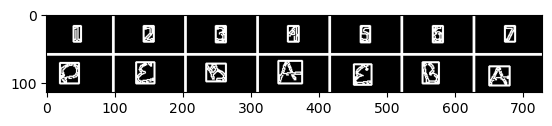

In [10]:
validation = [ i for i in validation if i != '' ]
validation = [[j for j in i] for i in validation]

import os 

files = os.listdir(path='./images_test')

response = []
names_images = []
counter = 1
for file in files:
    file_1 = os.path.join('./images_test', file)
    gray, img = prepro_img(file_1)
    answer_row = letter_pred(img, gray)
    response.append(answer_row)
    names_images.append(file_1)
    print('*'*10, answer_row,'*'*10)
    print('*'*10, counter,'*'*10)
    print('*'*10, file,'*'*10)
    counter+=1
    
response = [[j for j in i] for i in response]

for i in response:
    if len(i) > len_col:
        i.pop()

In [11]:
response_df = pd.DataFrame(response)
response_df.index += 1

In [12]:
def restructer(data_frame):
    response = []
    final_row = ''
    for i in range(len(data_frame)):
        for j in data_frame.iloc[i]:
            final_row += str(j)
        response.append(final_row)
        final_row=''
    return response

rest_resp = restructer(data_frame=response_df)
rest_val = restructer(data_frame=df_val)

In [13]:
max_row_score = len(rest_val)

row_score = 0

for i in range(len(rest_val)):
    if rest_val[i] == rest_resp[i]:
        # print(rest_val[i], i+1, 'right')
        row_score +=1
    else:
        print(rest_resp[i], i+1,'wrong')
        

acc_row_score = row_score/max_row_score
acc_row_score = round(acc_row_score, 3)

print('*'*10, max_row_score, 'Max score' ,'*'*10)
print('*'*10, row_score, 'Score' ,'*'*10)
print('*'*10, acc_row_score, 'Accuracy ' ,'*'*10)


ABCDDAD 24 wrong
ADCDBAE 34 wrong
DEDAEBA 47 wrong
********** 47 Max score **********
********** 44 Score **********
********** 0.936 Accuracy  **********


In [14]:
max_score = len(rest_val)*len(rest_val[0])

In [15]:
max_score = len(rest_val)*len(rest_val[0])
ind_score = 0

for i in range(len(rest_val)):
    for j in range(len(rest_val[i])):
        if rest_val[i][j] == rest_resp[i][j]:
            ind_score +=1
acc_ind_score = ind_score/max_score
acc_ind_score = round(acc_ind_score, 3)

print('*'*10, max_score, 'Max score' ,'*'*10)
print('*'*10, ind_score, 'Score' ,'*'*10)
print('*'*10, acc_ind_score, 'Accuracy ' ,'*'*10)


********** 329 Max score **********
********** 326 Score **********
********** 0.991 Accuracy  **********
